**CS5483 Project**

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random
import scipy.linalg as la
import gzip
import pandas as pd
import xlrd
import math

**Upload the edgelist with weights, the weight stands for distance of the railway.This is a sample for the first 11 lines.(In the file, 
the first line is total number of edges and total weights. So
need to skip and start from the second line)**

In [ ]:
railroad = open ("railroad_map.txt", 'rb')
line = railroad.readlines()[1:10]
G = nx.read_weighted_edgelist(line)
railroad.close()

**Display the edgelist (Undirected graph)**

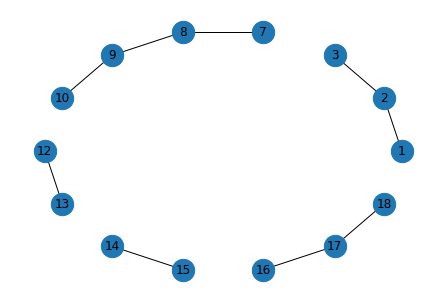

In [ ]:
degree_sequence = [d for n, d in G.degree()]
nx.draw_circular(G, node_color='C0',node_size=500, with_labels=True)
plt.show()

**After verify the sample, do one more time for the entire edge list**

In [ ]:
railroad = open ("railroad_map.txt", 'rb')
line = railroad.readlines()[1:]
train = nx.read_weighted_edgelist(line)
railroad.close()

In [ ]:
degree_train = [d for n, d in train.degree()]
edgeN = sum(degree_train)/2
print('The number of the edges is', edgeN)

The number of the edges is 3075.0


In [ ]:
ave_degree = sum(degree_train)/len(train)
print('The number of the average degree is %.2f' % ave_degree)

The number of the average degree is 2.39


In [ ]:
print('The maximum degree is %d' % max(degree_train))

The maximum degree is 11


**Trying to find the first 10 and the last 10 nodes with centrality degree from highest to lowest and then manipulate and do experiment on them**

In [ ]:
degree_centrality = nx.degree_centrality(train)

In [ ]:
train1 = train.copy()
degree_centrality1 = nx.degree_centrality(train1)

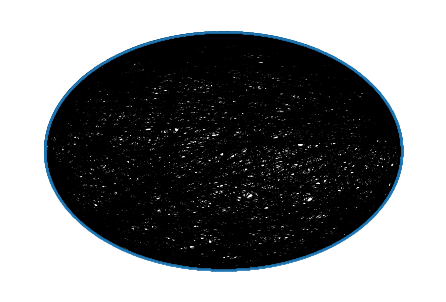

In [ ]:
degree_sequence = [d for n, d in train1.degree()]
nx.draw_circular(train1, node_color='C0',node_size=1,with_labels=False)
plt.show()

In [ ]:
components1 = nx.connected_components(train1)
numOfComponents = 0
for component in components1:
    print(f'{len(component)}: {component}')
    numOfComponents += 1

2525: {'1177', '1391', '1132', '895', '1399', '1870', '1692', '1265', '945', '1293', '1010', '455', '2291', '748', '1325', '1913', '912', '1449', '434', '683', '2335', '1862', '682', '1019', '1606', '1302', '1284', '1405', '1917', '1591', '292', '1055', '1763', '1169', '2042', '1252', '520', '1191', '104', '1536', '503', '1477', '1888', '9', '547', '205', '882', '590', '952', '1988', '139', '514', '769', '1084', '268', '1579', '1814', '444', '1483', '411', '2329', '1948', '621', '974', '378', '177', '1350', '705', '86', '1014', '2125', '354', '1897', '563', '1311', '538', '1626', '2256', '2106', '1907', '885', '1924', '471', '182', '2035', '1248', '2016', '100', '2441', '1831', '348', '1180', '1378', '420', '1270', '2102', '1401', '807', '656', '1071', '140', '1967', '1297', '1366', '981', '91', '2299', '1172', '1834', '162', '2250', '815', '52', '2089', '1532', '78', '980', '2328', '165', '2520', '462', '425', '1421', '768', '408', '23', '1633', '1023', '2081', '1149', '450', '902', '

In [ ]:
A = nx.adjacency_matrix(train1)
matA = A.todense()
print(matA)

[[ 0. 26.  0. ...  0.  0.  0.]
 [26.  0. 10. ...  0.  0.  0.]
 [ 0. 10.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0. 12.]
 [ 0.  0.  0. ...  0. 12.  0.]]


**Use this weight adjacency matrix to find the average weight**

In [ ]:
weightMat = np.array(matA)
le = len(degree_centrality1)

In [ ]:
degree_centrality2 = sorted((int(v), f"{c:0.6f}") for v, c in degree_centrality1.items())
for i in range(0, le):
  if (i != degree_centrality2[i][0]-1):
    degree_centrality2.insert(i, (i+1, '0'))

In [ ]:
centralities = [row[1] for row in degree_centrality2]
l = len(centralities)

In [ ]:
totalW = 0
for i in range(0, le):
  for j in range(0, le):
    if (weightMat[i][j]>0):
      totalW += weightMat[i][j]
print('The total weight is ', totalW/2)
averageW = totalW/edgeN/2
print('The average weight is ', averageW)

The total weight is  93608.0
The average weight is  30.441626016260162


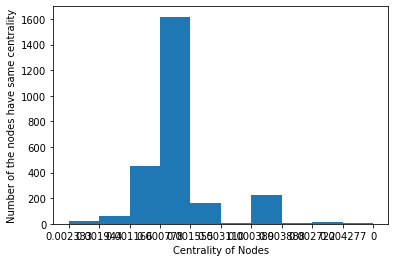

In [ ]:
plt.hist(centralities)
plt.xlabel('Centrality of Nodes')
plt.ylabel('Number of the nodes have same centrality')
plt.show()

**Find all the nodes have the highest centrality**

In [ ]:
listNode = []
highestCent = max(centralities)
for i in range(0, l):
  if(centralities[i] == highestCent):
    listNode.append(i)
print(listNode)

[96, 237]


**Find the first 100 locations have the highest centrality**

In [ ]:
for i in range(0, len(centralities)):
  centralities[i] = float(centralities[i])

In [ ]:
listNode100 = []
for i in range(0, 100): 
  indexNum = centralities.index(max(centralities))
  listNode100.append(indexNum+1) #There is no node 0 in this edgelist
  centralities[indexNum] = 0

In [ ]:
listComponents = [[]]
i = 0
components2 = nx.connected_components(train1)
for component in components2:
  listComponent = []
  for item in component:
    listComponent.append(int(item))
  listComponents.insert(i, listComponent)
  i += 1  

**To find out which nodes within the highest centrality are not in the giant component.**

In [ ]:
listNodeOut = []
for i in range(0, 100):
  if(not(listNode100[i] in listComponents[0])):
    listNodeOut.append(listNode100[i-1])
print(listNodeOut)

[]


In [ ]:
print(listComponents)

[[1177, 1391, 1132, 895, 1399, 1870, 1692, 1265, 945, 1293, 1010, 455, 2291, 748, 1325, 1913, 912, 1449, 434, 683, 2335, 1862, 682, 1019, 1606, 1302, 1284, 1405, 1917, 1591, 292, 1055, 1763, 1169, 2042, 1252, 520, 1191, 104, 1536, 503, 1477, 1888, 9, 547, 205, 882, 590, 952, 1988, 139, 514, 769, 1084, 268, 1579, 1814, 444, 1483, 411, 2329, 1948, 621, 974, 378, 177, 1350, 705, 86, 1014, 2125, 354, 1897, 563, 1311, 538, 1626, 2256, 2106, 1907, 885, 1924, 471, 182, 2035, 1248, 2016, 100, 2441, 1831, 348, 1180, 1378, 420, 1270, 2102, 1401, 807, 656, 1071, 140, 1967, 1297, 1366, 981, 91, 2299, 1172, 1834, 162, 2250, 815, 52, 2089, 1532, 78, 980, 2328, 165, 2520, 462, 425, 1421, 768, 408, 23, 1633, 1023, 2081, 1149, 450, 902, 298, 2413, 2034, 2551, 1038, 136, 879, 2241, 913, 1321, 856, 2180, 2327, 2331, 2168, 2407, 1747, 2350, 2069, 116, 87, 1934, 1602, 958, 1527, 843, 2007, 1809, 532, 1225, 1363, 936, 1787, 46, 157, 2190, 1634, 498, 99, 505, 690, 1758, 1362, 2550, 131, 2121, 898, 2039, 559,

**Obtain the latitude and longitude of each nodes**

In [ ]:
wb = xlrd.open_workbook("latitudelongitudeoftrain.xlsx")
train_sheet = wb.sheet_by_index(0)

In [ ]:
train_location = []
for i in range(0, l):
  trainstation = [train_sheet.cell_value(i+2, 6), train_sheet.cell_value(i+2, 7)]
  train_location.insert(i, trainstation)

In [ ]:
print(train_location)

[[32.94955, 117.384185], [31.891163, 117.323631], [32.920015, 115.875038], [31.352864, 118.397457], [30.953134, 118.780539], [33.853976, 115.804277], [33.64539, 117.000957], [33.64539, 117.000957], [34.422449, 116.336828], [31.721809, 116.505799], [31.712993, 118.508627], [31.619998, 117.897106], [32.636959, 117.02581], [29.728311, 118.328561], [30.162401, 118.663777], [32.065663, 118.289232], [33.973817, 116.809614], [30.918369, 119.415724], [31.867945, 117.492412], [30.537898, 117.058739], [31.632357, 115.982595], [31.056511, 116.985048], [31.866942, 117.282699], [33.494753, 116.24698], [32.775893, 117.995299], [29.871177, 118.575156], [29.871177, 118.575156], [29.852454, 117.735953], [31.346807, 117.18338], [33.322751, 117.313009], [32.204422, 118.32688], [30.465837, 116.306211], [30.640954, 118.999042], [30.660379, 116.56785], [31.515153, 117.166334], [32.644144, 115.560359], [30.948089, 117.823897], [30.625141, 117.528929], [30.235007, 116.110323], [34.365425, 116.704233], [29.644

**Find the nodes have the highest centralities in each small component**

In [ ]:
centralities1 = [row[1] for row in degree_centrality2]
for i in range(0, len(centralities1)):
  centralities1[i] = float(centralities1[i])

In [ ]:
listComponentsCentrality = [[]]
components3 = nx.connected_components(train1)
i = 0
for component in components3:
  listC = []
  for item in component:
    listC.append(centralities1[int(item)-1])
  listComponentsCentrality.insert(i, listC)
  i += 1  

In [ ]:
print(listComponentsCentrality)

[[0.001166, 0.001166, 0.000778, 0.000778, 0.000778, 0.000778, 0.000778, 0.000389, 0.001166, 0.000778, 0.001166, 0.001166, 0.000778, 0.000778, 0.000778, 0.000778, 0.000389, 0.000778, 0.000778, 0.000778, 0.000778, 0.000778, 0.001166, 0.001166, 0.000778, 0.000778, 0.000778, 0.000778, 0.000778, 0.000778, 0.000778, 0.001555, 0.000778, 0.000778, 0.000778, 0.001166, 0.001555, 0.000778, 0.001166, 0.001555, 0.001166, 0.000778, 0.000778, 0.000778, 0.001166, 0.001166, 0.000778, 0.001166, 0.000778, 0.000778, 0.002722, 0.001166, 0.000778, 0.000778, 0.001555, 0.001166, 0.001166, 0.002333, 0.001166, 0.002333, 0.000389, 0.000778, 0.000778, 0.000778, 0.001166, 0.001555, 0.001166, 0.000778, 0.002333, 0.000778, 0.000778, 0.000778, 0.000778, 0.001166, 0.001166, 0.000778, 0.001555, 0.000778, 0.000778, 0.000778, 0.001166, 0.000778, 0.000778, 0.001166, 0.000778, 0.000778, 0.000778, 0.001555, 0.000778, 0.000778, 0.000778, 0.000778, 0.000778, 0.001166, 0.000778, 0.000778, 0.000778, 0.001166, 0.000778, 0.000778

In [ ]:
lil = len(listComponentsCentrality)
listSmallNode = []
for i in range(1, lil-1):
  indexM = listComponentsCentrality[i].index(max(listComponentsCentrality[i]))
  listSmallNode.append(listComponents[i][indexM])


In [ ]:
print(listSmallNode)

[310, 630, 637, 1707, 1824, 1940, 2363, 2429, 2432, 2513, 2531]


In [ ]:
lcOne = len(listComponents[0])
ls = len(listSmallNode)
x1 = train_location[0][0]
y1 = train_location[0][1]
x2 = train_location[1][0]
y2 = train_location[1][1]
distOneTwo = math.sqrt((x1-x2)**2 + (y1-y2)**2)
listAddEdge = []
for j in range(0, ls):
  distance = []
  for i in range(0, lcOne):
    x_1 = train_location[listComponents[0][i]-1][0] # each x, y from the large component
    y_1 = train_location[listComponents[0][i]-1][1]
    x_2 = train_location[listSmallNode[j]-1][0]   # x, y from the highest centrality nodes in the first small component
    y_2 = train_location[listSmallNode[j]-1][1]
    dist = math.sqrt((x_1-x_2)**2 + (y_1-y_2)**2)
    distance.append(dist)
  indexMin = distance.index(min(distance))
  weightDist = distance[indexMin]*weightMat[0][1]/distOneTwo
  connectNode = listComponents[0][indexMin]
  listAddEdge.append([listSmallNode[j], connectNode, weightDist])

In [ ]:
line1 = line.copy()
print(line1)

[b'1 2 26\r\n', b'2 3 10\r\n', b'7 8 28\r\n', b'8 9 14\r\n', b'9 10 16\r\n', b'12 13 25\r\n', b'14 15 12\r\n', b'16 17 16\r\n', b'17 18 17\r\n', b'19 20 17\r\n', b'21 22 15\r\n', b'27 28 10\r\n', b'29 30 10\r\n', b'30 31 12\r\n', b'31 32 19\r\n', b'32 33 18\r\n', b'34 35 15\r\n', b'44 45 11\r\n', b'45 46 94\r\n', b'47 48 115\r\n', b'48 49 60\r\n', b'50 51 146\r\n', b'51 52 138\r\n', b'52 53 30\r\n', b'63 64 36\r\n', b'74 75 23\r\n', b'76 77 12\r\n', b'79 80 7\r\n', b'37 81 25\r\n', b'84 85 10\r\n', b'85 86 17\r\n', b'87 88 20\r\n', b'88 89 22\r\n', b'89 90 16\r\n', b'90 91 18\r\n', b'94 95 6\r\n', b'95 96 7\r\n', b'41 96 6\r\n', b'98 99 19\r\n', b'107 108 33\r\n', b'111 112 168\r\n', b'112 113 131\r\n', b'46 113 72\r\n', b'115 116 10\r\n', b'116 117 12\r\n', b'58 118 7\r\n', b'121 122 31\r\n', b'122 123 23\r\n', b'124 125 42\r\n', b'125 126 24\r\n', b'127 128 20\r\n', b'128 129 41\r\n', b'129 130 46\r\n', b'130 131 35\r\n', b'131 132 50\r\n', b'132 133 31\r\n', b'137 138 41\r\n', b'140

In [ ]:
lineList = []
for element in listAddEdge:
  lineList.append(b"%d %d %.5f\r\n" % (element[0], element[1], element[2]))
print(lineList)

[b'310 97 5.63003\r\n', b'630 1177 0.00000\r\n', b'637 1177 0.00000\r\n', b'1707 1177 0.00000\r\n', b'1824 2163 0.90746\r\n', b'1940 1177 0.00000\r\n', b'2363 2288 0.00000\r\n', b'2429 2497 3.01058\r\n', b'2432 2489 3.49592\r\n', b'2513 1177 0.00000\r\n', b'2531 2418 0.23435\r\n']


In [ ]:
for eachLine in lineList:
  line1.append(eachLine)
print(line1)

[b'1 2 26\r\n', b'2 3 10\r\n', b'7 8 28\r\n', b'8 9 14\r\n', b'9 10 16\r\n', b'12 13 25\r\n', b'14 15 12\r\n', b'16 17 16\r\n', b'17 18 17\r\n', b'19 20 17\r\n', b'21 22 15\r\n', b'27 28 10\r\n', b'29 30 10\r\n', b'30 31 12\r\n', b'31 32 19\r\n', b'32 33 18\r\n', b'34 35 15\r\n', b'44 45 11\r\n', b'45 46 94\r\n', b'47 48 115\r\n', b'48 49 60\r\n', b'50 51 146\r\n', b'51 52 138\r\n', b'52 53 30\r\n', b'63 64 36\r\n', b'74 75 23\r\n', b'76 77 12\r\n', b'79 80 7\r\n', b'37 81 25\r\n', b'84 85 10\r\n', b'85 86 17\r\n', b'87 88 20\r\n', b'88 89 22\r\n', b'89 90 16\r\n', b'90 91 18\r\n', b'94 95 6\r\n', b'95 96 7\r\n', b'41 96 6\r\n', b'98 99 19\r\n', b'107 108 33\r\n', b'111 112 168\r\n', b'112 113 131\r\n', b'46 113 72\r\n', b'115 116 10\r\n', b'116 117 12\r\n', b'58 118 7\r\n', b'121 122 31\r\n', b'122 123 23\r\n', b'124 125 42\r\n', b'125 126 24\r\n', b'127 128 20\r\n', b'128 129 41\r\n', b'129 130 46\r\n', b'130 131 35\r\n', b'131 132 50\r\n', b'132 133 31\r\n', b'137 138 41\r\n', b'140

In [ ]:
train2 = nx.read_weighted_edgelist(line1)
degree_train2 = [d for n, d in train2.degree()]
edgeN2 = sum(degree_train2)/2
print('The number of the edges is', edgeN2)
components_2 = nx.connected_components(train2)
numOfComponents = 0
for component in components_2:
    print(f'{len(component)}: {component}')
    numOfComponents += 1

The number of the edges is 3086.0
2573: {'1177', '1391', '1132', '895', '1399', '1870', '1692', '1265', '945', '1293', '1010', '455', '2291', '748', '1325', '1913', '912', '1449', '434', '683', '2335', '1862', '682', '1019', '1606', '1302', '1284', '1405', '1917', '1591', '292', '1055', '1763', '1169', '2042', '1252', '520', '1191', '104', '1536', '503', '1477', '1888', '9', '547', '205', '882', '590', '952', '1988', '139', '514', '769', '1084', '268', '1939', '1579', '1814', '444', '1483', '411', '2329', '1948', '621', '974', '378', '177', '1350', '705', '86', '1014', '2125', '354', '1897', '563', '1311', '538', '1626', '304', '2106', '1907', '885', '1924', '471', '182', '2035', '1248', '2016', '100', '315', '2441', '1831', '348', '1180', '1378', '420', '1270', '2102', '1401', '807', '656', '1071', '140', '1967', '1297', '1366', '981', '91', '2299', '1172', '1834', '162', '2250', '815', '52', '2089', '1532', '78', '980', '2328', '165', '2520', '462', '425', '1421', '768', '408', '23',